# Online Test Data Analyst - Bagas Naufal Alfathan
## Analis Data - Klamby

In [1]:
# import library/package yang akan digunakan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

sns.set_theme()
sns.set_palette("pastel")

## Import data dari format .xlsx menjadi dataframe

In [2]:
# import data excel menggunakan pandas
dataframe = pd.read_csv("Test-Analyst.xlsx - Worksheet.csv", delimiter=',')

# menampilkan 5 baris ter-atas dari data
dataframe.head(5)

,product_title,shipping_city,referrer_source,orders,gross_sales,discounts,returns,net_sales,shipping,total_sales,net_quantity
0,Canary Scarf Seafoam,Kota Palembang,Social,1,275.000.000,0,0,275.000.000,0,275.000.000,1
1,Claire Blouse Burnt Cinnamon,Kota Palembang,Social,1,238.000.000,0,0,238.000.000,0,238.000.000,1
2,Shea Blouse Sahara,Kab. Bogor,Social,1,535.000.000,0,0,535.000.000,0,535.000.000,1
3,Sheila Dress Clove,Kab. Bogor,Social,1,475.000.000,0,0,475.000.000,0,475.000.000,1
4,Amaya Blouse Hazelwood,Kab. Bogor,Social,1,545.000.000,0,0,545.000.000,0,545.000.000,1


## Data Understanding (Mengenali Data)

In [3]:
print('''
1. Kolom 'product_title'    :   Jenis Barang
2. Kolom 'shipping_city'    :   Destinasi pengiriman/Domisili kota atau kabupaten dari pembeli
3. Kolom 'referrer_source'  :   Media pemesanan
4. Kolom 'orders'           :   Total intensitas pembeli melakukan pembelian di Klamby
5. Kolom 'gross_sales'      :   Nominal untuk penjualan gross
6. Kolom 'discounts'        :   Nominal untuk potongan harga yang diberikan oleh Klamby
7. Kolom 'returns'          :   Saya belum mengetahui untuk kolom ini, karena mayoritas berisi '0', menurut saya ini kolom anomali (perlu didiskusikan lebih lanjut)
8. Kolom 'shipping'         :   Mungkin biaya pengiriman?
9. Kolom 'total_sales'      :   Total nominal penjualan bersih
10. Kolom 'net_quantity'    :   Kuantitas jenis barang yang dipesan oleh pembeli
''')


1. Kolom 'product_title'    :   Jenis Barang
2. Kolom 'shipping_city'    :   Destinasi pengiriman/Domisili kota atau kabupaten dari pembeli
3. Kolom 'referrer_source'  :   Media pemesanan
4. Kolom 'orders'           :   Total intensitas pembeli melakukan pembelian di Klamby
5. Kolom 'gross_sales'      :   Nominal untuk penjualan gross
6. Kolom 'discounts'        :   Nominal untuk potongan harga yang diberikan oleh Klamby
7. Kolom 'returns'          :   Saya belum mengetahui untuk kolom ini, karena mayoritas berisi '0', menurut saya ini kolom anomali (perlu didiskusikan lebih lanjut)
8. Kolom 'shipping'         :   Mungkin biaya pengiriman?
9. Kolom 'total_sales'      :   Total nominal penjualan bersih
10. Kolom 'net_quantity'    :   Kuantitas jenis barang yang dipesan oleh pembeli



## Cleansing Data (Pembersihan Data)

In [4]:
# Melihat jumlah null value (data kosong) dari data
dataframe.isna().sum()

product_title      0
shipping_city      0
referrer_source    0
orders             0
gross_sales        0
discounts          0
returns            0
net_sales          0
shipping           0
total_sales        0
net_quantity       0
dtype: int64

In [5]:
# Melihat tipe data dari setiap kolom
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   product_title    219 non-null    object
 1   shipping_city    219 non-null    object
 2   referrer_source  219 non-null    object
 3   orders           219 non-null    int64 
 4   gross_sales      219 non-null    object
 5   discounts        219 non-null    object
 6   returns          219 non-null    object
 7   net_sales        219 non-null    object
 8   shipping         219 non-null    int64 
 9   total_sales      219 non-null    object
 10  net_quantity     219 non-null    int64 
dtypes: int64(3), object(8)
memory usage: 18.9+ KB


### Mengubah tipe data dari setiap kolom ke tipe data yang seharusnya
- Kolom 'gross_sales' :   object to integer
- Kolom 'discounts'   :   object to integer
- Kolom 'returns'     :   object to integer
- Kolom 'net_sales'   :   object to integer
- Kolom 'total_sales' :   object to integer

In [6]:
# Menghilangkan karakter '.' (titik) dari data
kolom = ['gross_sales', 'discounts', 'returns', 'net_sales', 'total_sales']
dataframe[kolom] = dataframe[kolom].replace('\.', '', regex=True)
dataframe['discounts'] = dataframe['discounts'].replace('\-', '', regex=True)

In [7]:
dataframe[kolom] = dataframe[kolom].astype('Int64')

In [8]:
dataframe.head()

,product_title,shipping_city,referrer_source,orders,gross_sales,discounts,returns,net_sales,shipping,total_sales,net_quantity
0,Canary Scarf Seafoam,Kota Palembang,Social,1,275000000,0,0,275000000,0,275000000,1
1,Claire Blouse Burnt Cinnamon,Kota Palembang,Social,1,238000000,0,0,238000000,0,238000000,1
2,Shea Blouse Sahara,Kab. Bogor,Social,1,535000000,0,0,535000000,0,535000000,1
3,Sheila Dress Clove,Kab. Bogor,Social,1,475000000,0,0,475000000,0,475000000,1
4,Amaya Blouse Hazelwood,Kab. Bogor,Social,1,545000000,0,0,545000000,0,545000000,1


In [9]:
# melihat kondisi data setelah mengubah tipe data dari kolom numerik menjadi integer
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   product_title    219 non-null    object
 1   shipping_city    219 non-null    object
 2   referrer_source  219 non-null    object
 3   orders           219 non-null    int64 
 4   gross_sales      219 non-null    Int64 
 5   discounts        219 non-null    Int64 
 6   returns          219 non-null    Int64 
 7   net_sales        219 non-null    Int64 
 8   shipping         219 non-null    int64 
 9   total_sales      219 non-null    Int64 
 10  net_quantity     219 non-null    int64 
dtypes: Int64(5), int64(3), object(3)
memory usage: 20.0+ KB


### Walaupun tidak terdapat null value, namun perlu memastikan bahwa kolom numerik yang seharusnya berisi selain 0, yaitu kolom 'gross_sales', 'net_sales', dan 'total_sales'

In [10]:
# data kolom 'gross_sales'
dataframe.loc[dataframe['gross_sales'] == 0]

,product_title,shipping_city,referrer_source,orders,gross_sales,discounts,returns,net_sales,shipping,total_sales,net_quantity
96,Ruby Shirt Ocean Mist,Kota Bandung,Social,0,0,0,-495000000,-495000000,0,-495000000,-1


In [11]:
# data kolom 'net_sales'
dataframe.loc[dataframe['net_sales'] == 0]

,product_title,shipping_city,referrer_source,orders,gross_sales,discounts,returns,net_sales,shipping,total_sales,net_quantity


In [12]:
# data kolom 'total_sales'
dataframe.loc[dataframe['total_sales'] == 0]

,product_title,shipping_city,referrer_source,orders,gross_sales,discounts,returns,net_sales,shipping,total_sales,net_quantity


### Terdapat baris yang bersifat anomali, karena :
1. Tidak terdapat jumlah pemesanan dari produk tersebut
2. Tidak tertera nominal penjualannya (karena tidak ada orders), melainkan hanya ada returns, net_sales, dan total_sales yang memiliki nominal minus

Kemungkinan ada kesalahan pada pengambilan data, maka akan saya drop/buang baris tersebut

In [13]:
# drop (membuang) baris yang bersifat anomali
dataframe.drop(dataframe[dataframe['orders'] == 0].index, inplace=True)

In [14]:
# cek kembali apakah masih ada baris tersebut?
dataframe[dataframe['orders'] == 0]

,product_title,shipping_city,referrer_source,orders,gross_sales,discounts,returns,net_sales,shipping,total_sales,net_quantity


In [15]:
dataframe.head()

,product_title,shipping_city,referrer_source,orders,gross_sales,discounts,returns,net_sales,shipping,total_sales,net_quantity
0,Canary Scarf Seafoam,Kota Palembang,Social,1,275000000,0,0,275000000,0,275000000,1
1,Claire Blouse Burnt Cinnamon,Kota Palembang,Social,1,238000000,0,0,238000000,0,238000000,1
2,Shea Blouse Sahara,Kab. Bogor,Social,1,535000000,0,0,535000000,0,535000000,1
3,Sheila Dress Clove,Kab. Bogor,Social,1,475000000,0,0,475000000,0,475000000,1
4,Amaya Blouse Hazelwood,Kab. Bogor,Social,1,545000000,0,0,545000000,0,545000000,1


### Saya merasa perlu merapihkan data, dan mengubahnya agar lebih ringkas dan dapat lebih dipahami. Saya akan melakukan:
1. Memisahkan 'product_title' menjadi 3 (tiga) kolom, yaitu menjadi kolom 'product_type' (scarf, dress, blouse, dll), kolom 'product_name', dan kolom 'product_color'
2. Mengubah nama kolom 'orders' menjadi 'intensity_orders'
3. Menciptakan kolom baru, yaitu 'unit_price' (harga satuan) dari setiap jenis product
4. Tidak menganggap kolom 'returns', karena mayoritas bernilai 0, dan ada hanya 1 nilai, yaitu -495000000 pada data baris ke 97
5. Mengubah nama kolom 'net_quantity' menjadi 'total_product_orders'

#### 1. Memisahkan Memisahkan 'product_title' menjadi 3 (tiga) kolom, yaitu menjadi kolom 'product_type' (scarf, dress, blouse, dll), kolom 'product_name', dan kolom 'product_color

In [16]:
dataframe['product_title'] = dataframe['product_title'].replace('[\(\)]', '', regex=True)

In [17]:
dataframe.head()

,product_title,shipping_city,referrer_source,orders,gross_sales,discounts,returns,net_sales,shipping,total_sales,net_quantity
0,Canary Scarf Seafoam,Kota Palembang,Social,1,275000000,0,0,275000000,0,275000000,1
1,Claire Blouse Burnt Cinnamon,Kota Palembang,Social,1,238000000,0,0,238000000,0,238000000,1
2,Shea Blouse Sahara,Kab. Bogor,Social,1,535000000,0,0,535000000,0,535000000,1
3,Sheila Dress Clove,Kab. Bogor,Social,1,475000000,0,0,475000000,0,475000000,1
4,Amaya Blouse Hazelwood,Kab. Bogor,Social,1,545000000,0,0,545000000,0,545000000,1


In [18]:
# Membagi kolom "product_title" menjadi tiga kolom baru: "product_name", "product_type", dan "product_color"
dataframe[['product_name', 'product_type', 'product_color']] = dataframe['product_title'].str.split(' ', 2, expand=True)

# Menampilkan 5 baris data ter-atas dari dataframe
dataframe.head()

C:\Users\Acer\AppData\Local\Temp\ipykernel_5652\3055566034.py:2: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  dataframe[['product_name', 'product_type', 'product_color']] = dataframe['product_title'].str.split(' ', 2, expand=True)


,product_title,shipping_city,referrer_source,orders,gross_sales,discounts,returns,net_sales,shipping,total_sales,net_quantity,product_name,product_type,product_color
0,Canary Scarf Seafoam,Kota Palembang,Social,1,275000000,0,0,275000000,0,275000000,1,Canary,Scarf,Seafoam
1,Claire Blouse Burnt Cinnamon,Kota Palembang,Social,1,238000000,0,0,238000000,0,238000000,1,Claire,Blouse,Burnt Cinnamon
2,Shea Blouse Sahara,Kab. Bogor,Social,1,535000000,0,0,535000000,0,535000000,1,Shea,Blouse,Sahara
3,Sheila Dress Clove,Kab. Bogor,Social,1,475000000,0,0,475000000,0,475000000,1,Sheila,Dress,Clove
4,Amaya Blouse Hazelwood,Kab. Bogor,Social,1,545000000,0,0,545000000,0,545000000,1,Amaya,Blouse,Hazelwood


In [19]:
dataframe.product_type.unique()

array(['Scarf', 'Blouse', 'Dress', 'Shirt', 'Tunic', 'Pleated', 'Outer',
       'Brooch', 'Prayer', 'Skirt', 'Classic', 'Pants', 'Monogram',
       'Wide', 'Pashmina'], dtype=object)

Dari rincian di atas masih terdapat kesalahan dalam product type, karena 'Classic', 'Monogram'. Dan 'Wide' seharusnya adalah 'Wide Pants', lalu 'Pleated' seharusnya 'Pleated Skirt'

In [20]:
# Daftar nilai yang harus diganti dengan 'product_type'
values_to_replace = ['Scarf', 'Blouse', 'Dress', 'Shirt', 'Tunic', 'Pleated Skirt', 'Outer',
       'Brooch', 'Prayer Mat', 'Skirt', 'Pants', 'Wide Pants', 'Pashmina']

# Mengganti nilai dalam kolom "product_title" dengan nilai yang sesuai
dataframe['product_type'] = dataframe['product_title'].apply(lambda x: next((item for item in values_to_replace if item in x), x))

# Menampilkan hasilnya
dataframe.head()

,product_title,shipping_city,referrer_source,orders,gross_sales,discounts,returns,net_sales,shipping,total_sales,net_quantity,product_name,product_type,product_color
0,Canary Scarf Seafoam,Kota Palembang,Social,1,275000000,0,0,275000000,0,275000000,1,Canary,Scarf,Seafoam
1,Claire Blouse Burnt Cinnamon,Kota Palembang,Social,1,238000000,0,0,238000000,0,238000000,1,Claire,Blouse,Burnt Cinnamon
2,Shea Blouse Sahara,Kab. Bogor,Social,1,535000000,0,0,535000000,0,535000000,1,Shea,Blouse,Sahara
3,Sheila Dress Clove,Kab. Bogor,Social,1,475000000,0,0,475000000,0,475000000,1,Sheila,Dress,Clove
4,Amaya Blouse Hazelwood,Kab. Bogor,Social,1,545000000,0,0,545000000,0,545000000,1,Amaya,Blouse,Hazelwood


In [21]:
# Daftar nilai yang harus diganti dengan 'product_type'
words_before_product_name = ['Scarf', 'Blouse', 'Dress', 'Shirt', 'Tunic', 'Pleated Skirt', 'Outer', 'Brooch', 'Prayer Mat', 'Skirt', 'Pants', 'Wide Pants', 'Pashmina']

# Mengganti nilai dalam kolom "product_title" dengan nilai yang sesuai
dataframe['product_type'] = dataframe['product_title'].apply(lambda x: next((item for item in words_before_product_name if item in x), None))
dataframe['product_name_or_series_name'] = dataframe.apply(lambda row: row['product_title'].split(row['product_type'], 1)[0].strip() if row['product_type'] is not None else row['product_title'], axis=1)

# Menampilkan hasilnya
dataframe.head(5)

,product_title,shipping_city,referrer_source,orders,gross_sales,discounts,returns,net_sales,shipping,total_sales,net_quantity,product_name,product_type,product_color,product_name_or_series_name
0,Canary Scarf Seafoam,Kota Palembang,Social,1,275000000,0,0,275000000,0,275000000,1,Canary,Scarf,Seafoam,Canary
1,Claire Blouse Burnt Cinnamon,Kota Palembang,Social,1,238000000,0,0,238000000,0,238000000,1,Claire,Blouse,Burnt Cinnamon,Claire
2,Shea Blouse Sahara,Kab. Bogor,Social,1,535000000,0,0,535000000,0,535000000,1,Shea,Blouse,Sahara,Shea
3,Sheila Dress Clove,Kab. Bogor,Social,1,475000000,0,0,475000000,0,475000000,1,Sheila,Dress,Clove,Sheila
4,Amaya Blouse Hazelwood,Kab. Bogor,Social,1,545000000,0,0,545000000,0,545000000,1,Amaya,Blouse,Hazelwood,Amaya


In [22]:
dataframe.product_name_or_series_name.unique()

array(['Canary', 'Claire', 'Shea', 'Sheila', 'Amaya', 'Mia', 'Ana',
       'Nicole', 'Alina', 'Adrianna', 'Fika', 'Ruby', 'Yasmin', 'Yara',
       'Savanna', 'Sara', 'Selena', 'Dylan', 'Amanda', 'Camilla', 'Alice',
       'Bali', 'Kala', 'Samara', 'Dayu', 'Elena', 'Talia', 'Thalia',
       'Casey', 'Edith', 'Tulip', 'Lolly', 'Marine', 'Laura', 'Bella',
       'Gina', 'Kiara', 'The Classic Monogram', 'Samantha', 'Poppy',
       'Daphne', 'Valerie', 'Toba', 'Hailey', 'Adelyn', 'Myra', 'Lana',
       'Zoey', 'Klamby Monogram', 'Ulos', 'Deli', 'Vienna', 'Laila',
       'Mandalika', 'Safa', 'Cecilia', 'Layla', 'Kirana', 'Ruby Wide',
       'Kenanga', 'Chloe', 'Maia', 'Nora', 'Cessy', 'Elie', 'Gia',
       'Clair', 'Arvin', 'Ayana', 'Anya', 'Namira', 'Chain', 'Daisy'],
      dtype=object)

In [23]:
# Daftar nilai yang harus diganti dengan 'product_type'
words_before_product_color = ['Scarf', 'Blouse', 'Dress', 'Shirt', 'Tunic', 'Pleated Skirt', 'Outer', 'Brooch', 'Prayer Mat', 'Skirt', 'Pants', 'Wide Pants', 'Pashmina']

# Mengganti nilai dalam kolom "product_title" dengan nilai yang sesuai
dataframe['product_type'] = dataframe['product_title'].apply(lambda x: next((item for item in words_before_product_color if item in x), None))
dataframe['product_name_or_series_name'] = dataframe.apply(lambda row: row['product_title'].split(row['product_type'], 1)[0].strip() if row['product_type'] is not None else row['product_title'], axis=1)
dataframe['product_color'] = dataframe.apply(lambda row: row['product_title'].split(row['product_type'], 1)[1].strip() if row['product_type'] is not None else None, axis=1)

# Menampilkan hasilnya
dataframe.head()


,product_title,shipping_city,referrer_source,orders,gross_sales,discounts,returns,net_sales,shipping,total_sales,net_quantity,product_name,product_type,product_color,product_name_or_series_name
0,Canary Scarf Seafoam,Kota Palembang,Social,1,275000000,0,0,275000000,0,275000000,1,Canary,Scarf,Seafoam,Canary
1,Claire Blouse Burnt Cinnamon,Kota Palembang,Social,1,238000000,0,0,238000000,0,238000000,1,Claire,Blouse,Burnt Cinnamon,Claire
2,Shea Blouse Sahara,Kab. Bogor,Social,1,535000000,0,0,535000000,0,535000000,1,Shea,Blouse,Sahara,Shea
3,Sheila Dress Clove,Kab. Bogor,Social,1,475000000,0,0,475000000,0,475000000,1,Sheila,Dress,Clove,Sheila
4,Amaya Blouse Hazelwood,Kab. Bogor,Social,1,545000000,0,0,545000000,0,545000000,1,Amaya,Blouse,Hazelwood,Amaya


In [24]:
dataframe.product_color.unique()

array(['Seafoam', 'Burnt Cinnamon', 'Sahara', 'Clove', 'Hazelwood',
       'Minor Walnut', 'Antique White', 'Amethyst', 'Minor Cherry',
       'Lavender', 'Soft Peach', 'Cloud Grey', 'Minor Almond',
       'Cotton Candy', 'Ocean Mist', 'Desert', 'Blush', 'Mahogany',
       'Minor Misty Grey', 'Misty Grey', 'Coral', 'Woodcreme',
       'Crystal Ruby', 'Dawn', '', 'Hazel', 'Midnight Moon', 'Sierra',
       'Almond Milk', 'Ruby', 'Caramel', 'Black', 'Woodrose',
       'Minor Caramel', 'Red Pear', 'Ivory', 'Charcoal', 'Cherry Blossom',
       'Blue Mojito', 'Minor Lemon Grass', 'Lettuce', 'Minor Charcoal',
       'Almond', 'Lemongrass', 'Minor Blueberry', 'Cloud', 'Ginger',
       'Lime Green', 'Powder Blue', 'Almond Latte', 'Minor Cayenne',
       'Minor Very Berry', 'Gravel', 'Terracota', 'Deep Ocean',
       'Primrose', 'Lilac Grey', 'Cream', 'Dusty Pink', 'Classic Blue',
       'Rose Gold', 'Raspberry', 'Mocca', 'White Marble', 'Pink Shell',
       'Emerald', 'Pistachio', 'Minor Nutmeg

In [25]:
dataframe.isna().sum()

product_title                  0
shipping_city                  0
referrer_source                0
orders                         0
gross_sales                    0
discounts                      0
returns                        0
net_sales                      0
shipping                       0
total_sales                    0
net_quantity                   0
product_name                   0
product_type                   0
product_color                  0
product_name_or_series_name    0
dtype: int64

In [26]:
dataframe[dataframe['product_color'] == '']

,product_title,shipping_city,referrer_source,orders,gross_sales,discounts,returns,net_sales,shipping,total_sales,net_quantity,product_name,product_type,product_color,product_name_or_series_name
29,Alice Brooch,Kota Blitar,Direct,1,350000000,0,0,350000000,0,350000000,1,Alice,Brooch,,Alice
43,Alice Brooch,Kab. Banjarnegara,Social,1,350000000,0,0,350000000,0,350000000,1,Alice,Brooch,,Alice
71,Alice Brooch,Kota Palu,Social,1,350000000,0,0,350000000,0,350000000,1,Alice,Brooch,,Alice
95,Alice Brooch,Kab. Bekasi,Social,1,700000000,0,0,700000000,0,700000000,2,Alice,Brooch,,Alice


In [27]:
dataframe[dataframe['product_color'] == ''] = dataframe[dataframe['product_color'] == ''] .replace('', 'not defined')

In [28]:
# Menampilkan hasilnya
dataframe[dataframe['product_color'] == 'not defined']

,product_title,shipping_city,referrer_source,orders,gross_sales,discounts,returns,net_sales,shipping,total_sales,net_quantity,product_name,product_type,product_color,product_name_or_series_name
29,Alice Brooch,Kota Blitar,Direct,1,350000000,0,0,350000000,0,350000000,1,Alice,Brooch,not defined,Alice
43,Alice Brooch,Kab. Banjarnegara,Social,1,350000000,0,0,350000000,0,350000000,1,Alice,Brooch,not defined,Alice
71,Alice Brooch,Kota Palu,Social,1,350000000,0,0,350000000,0,350000000,1,Alice,Brooch,not defined,Alice
95,Alice Brooch,Kab. Bekasi,Social,1,700000000,0,0,700000000,0,700000000,2,Alice,Brooch,not defined,Alice


### 2. Mengubah nama kolom 'orders' menjadi 'intensity_orders', dan 'net_quantity' menjadi 'total_product_orders'

In [29]:
# Mengganti nama kolom 'orders' menjadi 'intensity_orders', dan kolom 'net_quantity' menjadi 'orders_quantity'
dataframe.rename(columns={'orders': 'intensity_orders',
                          'net_quantity': 'orders_quantity'}, inplace=True)

In [30]:
dataframe.head()

,product_title,shipping_city,referrer_source,intensity_orders,gross_sales,discounts,returns,net_sales,shipping,total_sales,orders_quantity,product_name,product_type,product_color,product_name_or_series_name
0,Canary Scarf Seafoam,Kota Palembang,Social,1,275000000,0,0,275000000,0,275000000,1,Canary,Scarf,Seafoam,Canary
1,Claire Blouse Burnt Cinnamon,Kota Palembang,Social,1,238000000,0,0,238000000,0,238000000,1,Claire,Blouse,Burnt Cinnamon,Claire
2,Shea Blouse Sahara,Kab. Bogor,Social,1,535000000,0,0,535000000,0,535000000,1,Shea,Blouse,Sahara,Shea
3,Sheila Dress Clove,Kab. Bogor,Social,1,475000000,0,0,475000000,0,475000000,1,Sheila,Dress,Clove,Sheila
4,Amaya Blouse Hazelwood,Kab. Bogor,Social,1,545000000,0,0,545000000,0,545000000,1,Amaya,Blouse,Hazelwood,Amaya


### 3. Menciptakan kolom baru, yaitu 'unit_price' (harga satuan) dari setiap jenis product

In [31]:
dataframe['unit_price'] = (dataframe['gross_sales'].div(dataframe['orders_quantity']))

In [32]:
# menampilkan contohnya
dataframe[dataframe['orders_quantity'] == 2]

,product_title,shipping_city,referrer_source,intensity_orders,gross_sales,discounts,returns,net_sales,shipping,total_sales,orders_quantity,product_name,product_type,product_color,product_name_or_series_name,unit_price
74,Valerie Dress Terracota,Labuhan Batu Selatan,Social,1,950000000,0,0,950000000,0,950000000,2,Valerie,Dress,Terracota,Valerie,475000000.0
95,Alice Brooch,Kab. Bekasi,Social,1,700000000,0,0,700000000,0,700000000,2,Alice,Brooch,not defined,Alice,350000000.0
135,Alice Pashmina Plain Mauve,Kota Depok,Search,1,170000000,0,0,170000000,0,170000000,2,Alice,Pashmina,Plain Mauve,Alice,85000000.0
166,Arvin Shirt Oatmeal,Kab. Bandung,Social,1,650000000,0,0,650000000,0,650000000,2,Arvin,Shirt,Oatmeal,Arvin,325000000.0
176,Ruby Scarf Ocean Mist,Kota Sungai Penuh,Social,1,590000000,0,0,590000000,0,590000000,2,Ruby,Scarf,Ocean Mist,Ruby,295000000.0
178,Selena Dress Misty Grey,Kota Tangerang,Social,1,950000000,0,0,950000000,0,950000000,2,Selena,Dress,Misty Grey,Selena,475000000.0
194,Camilla Tunic Dove,Sawahlunto,Direct,1,1130000000,0,0,1130000000,0,1130000000,2,Camilla,Tunic,Dove,Camilla,565000000.0
195,Safa Dress Minor Blueberry,Kota Adm. Jakarta Barat,Social,1,910000000,0,0,910000000,0,910000000,2,Safa,Dress,Minor Blueberry,Safa,455000000.0


### 4. Tidak menganggap kolom 'returns', karena mayoritas bernilai 0, dan ada hanya 1 nilai, yaitu -495000000 pada data baris ke 97. Lalu kolom 'shipping' yang semuanya bernilai 0; dan saya membuang kolom 'orders', karena telah digambarkan oleh 'orders_quantity'

In [33]:
dataframe.drop(columns=['product_name', 'shipping', 'returns', 'intensity_orders'])

,product_title,shipping_city,referrer_source,gross_sales,discounts,net_sales,total_sales,orders_quantity,product_type,product_color,product_name_or_series_name,unit_price
0,Canary Scarf Seafoam,Kota Palembang,Social,275000000,0,275000000,275000000,1,Scarf,Seafoam,Canary,275000000.0
1,Claire Blouse Burnt Cinnamon,Kota Palembang,Social,238000000,0,238000000,238000000,1,Blouse,Burnt Cinnamon,Claire,238000000.0
2,Shea Blouse Sahara,Kab. Bogor,Social,535000000,0,535000000,535000000,1,Blouse,Sahara,Shea,535000000.0
3,Sheila Dress Clove,Kab. Bogor,Social,475000000,0,475000000,475000000,1,Dress,Clove,Sheila,475000000.0
4,Amaya Blouse Hazelwood,Kab. Bogor,Social,545000000,0,545000000,545000000,1,Blouse,Hazelwood,Amaya,545000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
214,Bella Blouse Strawberry,Surabaya,Search,350000000,0,350000000,350000000,1,Blouse,Strawberry,Bella,350000000.0
215,Valerie Dress Gravel,Kab. Jember,Social,475000000,0,475000000,475000000,1,Dress,Gravel,Valerie,475000000.0
216,Alice Blouse Caramel Latte,Jakarta,Social,200000000,0,200000000,200000000,1,Blouse,Caramel Latte,Alice,200000000.0
217,Amanda Dress Almond Latte,Kab. Jember,Social,475000000,0,475000000,475000000,1,Dress,Almond Latte,Amanda,475000000.0


In [34]:
dataframe.head()

,product_title,shipping_city,referrer_source,intensity_orders,gross_sales,discounts,returns,net_sales,shipping,total_sales,orders_quantity,product_name,product_type,product_color,product_name_or_series_name,unit_price
0,Canary Scarf Seafoam,Kota Palembang,Social,1,275000000,0,0,275000000,0,275000000,1,Canary,Scarf,Seafoam,Canary,275000000.0
1,Claire Blouse Burnt Cinnamon,Kota Palembang,Social,1,238000000,0,0,238000000,0,238000000,1,Claire,Blouse,Burnt Cinnamon,Claire,238000000.0
2,Shea Blouse Sahara,Kab. Bogor,Social,1,535000000,0,0,535000000,0,535000000,1,Shea,Blouse,Sahara,Shea,535000000.0
3,Sheila Dress Clove,Kab. Bogor,Social,1,475000000,0,0,475000000,0,475000000,1,Sheila,Dress,Clove,Sheila,475000000.0
4,Amaya Blouse Hazelwood,Kab. Bogor,Social,1,545000000,0,0,545000000,0,545000000,1,Amaya,Blouse,Hazelwood,Amaya,545000000.0


In [35]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 218 entries, 0 to 218
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   product_title                218 non-null    object 
 1   shipping_city                218 non-null    object 
 2   referrer_source              218 non-null    object 
 3   intensity_orders             218 non-null    int64  
 4   gross_sales                  218 non-null    Int64  
 5   discounts                    218 non-null    Int64  
 6   returns                      218 non-null    Int64  
 7   net_sales                    218 non-null    Int64  
 8   shipping                     218 non-null    int64  
 9   total_sales                  218 non-null    Int64  
 10  orders_quantity              218 non-null    int64  
 11  product_name                 218 non-null    object 
 12  product_type                 218 non-null    object 
 13  product_color       

In [36]:
# Menentukan urutan kolom
column_order = ['product_title', 'product_name_or_series_name', 'product_type', 'product_color', 'shipping_city', 'referrer_source',  'orders_quantity', 'unit_price', 'gross_sales', 'discounts', 'net_sales', 'total_sales']

# Mengatur ulang susunan kolom sesuai dengan urutan yang diinginkan
dataframe = dataframe.reindex(columns=column_order)

dataframe.drop(columns='total_sales')

# Menampilkan DataFrame setelah pengubahan urutan kolom
dataframe.head()

,product_title,product_name_or_series_name,product_type,product_color,shipping_city,referrer_source,orders_quantity,unit_price,gross_sales,discounts,net_sales,total_sales
0,Canary Scarf Seafoam,Canary,Scarf,Seafoam,Kota Palembang,Social,1,275000000.0,275000000,0,275000000,275000000
1,Claire Blouse Burnt Cinnamon,Claire,Blouse,Burnt Cinnamon,Kota Palembang,Social,1,238000000.0,238000000,0,238000000,238000000
2,Shea Blouse Sahara,Shea,Blouse,Sahara,Kab. Bogor,Social,1,535000000.0,535000000,0,535000000,535000000
3,Sheila Dress Clove,Sheila,Dress,Clove,Kab. Bogor,Social,1,475000000.0,475000000,0,475000000,475000000
4,Amaya Blouse Hazelwood,Amaya,Blouse,Hazelwood,Kab. Bogor,Social,1,545000000.0,545000000,0,545000000,545000000


In [37]:
dataframe.unit_price.unique()

<FloatingArray>
[275000000.0, 238000000.0, 535000000.0, 475000000.0, 545000000.0, 330000000.0,
 235000000.0, 225000000.0, 350000000.0, 245000000.0, 205000000.0, 295000000.0,
 575000000.0, 395000000.0, 685000000.0, 250000000.0, 325000000.0, 649000000.0,
 262500000.0, 185000000.0, 385000000.0, 345000000.0, 845000000.0, 365000000.0,
 169000000.0, 455000000.0, 269500000.0, 485000000.0, 200000000.0, 540000000.0,
 115000000.0, 495000000.0, 525000000.0,  85000000.0, 950000000.0, 375000000.0,
 565000000.0, 549000000.0]
Length: 38, dtype: Float64

In [38]:
# mengubah tipe data unit_price menjadi integer
dataframe.unit_price = dataframe.unit_price.astype('int64')

In [39]:
dataframe.head()

,product_title,product_name_or_series_name,product_type,product_color,shipping_city,referrer_source,orders_quantity,unit_price,gross_sales,discounts,net_sales,total_sales
0,Canary Scarf Seafoam,Canary,Scarf,Seafoam,Kota Palembang,Social,1,275000000,275000000,0,275000000,275000000
1,Claire Blouse Burnt Cinnamon,Claire,Blouse,Burnt Cinnamon,Kota Palembang,Social,1,238000000,238000000,0,238000000,238000000
2,Shea Blouse Sahara,Shea,Blouse,Sahara,Kab. Bogor,Social,1,535000000,535000000,0,535000000,535000000
3,Sheila Dress Clove,Sheila,Dress,Clove,Kab. Bogor,Social,1,475000000,475000000,0,475000000,475000000
4,Amaya Blouse Hazelwood,Amaya,Blouse,Hazelwood,Kab. Bogor,Social,1,545000000,545000000,0,545000000,545000000


In [40]:
dataframe.shipping_city.unique()

array(['Kota Palembang', 'Kab. Bogor', 'Kab. Lamongan',
       'Tangerang Selatan', 'Palembang', 'Pangkalpinang', 'Prabumulih',
       'Jakarta Barat', 'Kota Depok', 'Kab. Jember', 'Kota Yogyakarta',
       'Kota Malang', 'Kota Balikpapan', 'Kab. Bangka Barat',
       'Kota Pekanbaru', 'Kab. Sidoarjo', 'Kab. Bekasi', 'Kota Bekasi',
       'Kota Blitar', 'Bekasi', 'Tangerang', 'Kabupaten Cirebon',
       'Kota Tangerang', 'Kab. Banjarnegara', 'Kota Pare Pare',
       'Kota Binjai', 'Ketapant', 'Sleman', 'Pontianak', 'Kab. Ketapang',
       'Kab. Langkat', 'Kab. Karawang', 'Kota Tangerang Selatan',
       'Kab. Deli Serdang', 'Kota Semarang', 'Jombang', 'Kota Jambi',
       'Kota Bogor', 'Kota Surabaya', 'Kab. Pasaman Barat',
       'Kab. Banyumas', 'Kota Palu', 'Kota Surakarta',
       'Labuhan Batu Selatan', 'Kota Sawahlunto', 'Jakarta Selatan',
       'Bandung', 'Kota Bandung', 'Kota Padang',
       'Kabupaten Rejang Lebong', 'Kota Prabumulih', 'Tanjungpinang',
       'Kota Adm. Jakar

In [41]:
# Menyeragamkan nama Kota Jakarta menjadi hanya seperti "Jakarta Timur", "Jakarta Barat", dan seterusnya
dataframe['shipping_city'] = dataframe['shipping_city'].str.replace(r'.*Jakarta', r'Jakarta', regex=True)

In [42]:
dataframe.shipping_city.unique()

array(['Kota Palembang', 'Kab. Bogor', 'Kab. Lamongan',
       'Tangerang Selatan', 'Palembang', 'Pangkalpinang', 'Prabumulih',
       'Jakarta Barat', 'Kota Depok', 'Kab. Jember', 'Kota Yogyakarta',
       'Kota Malang', 'Kota Balikpapan', 'Kab. Bangka Barat',
       'Kota Pekanbaru', 'Kab. Sidoarjo', 'Kab. Bekasi', 'Kota Bekasi',
       'Kota Blitar', 'Bekasi', 'Tangerang', 'Kabupaten Cirebon',
       'Kota Tangerang', 'Kab. Banjarnegara', 'Kota Pare Pare',
       'Kota Binjai', 'Ketapant', 'Sleman', 'Pontianak', 'Kab. Ketapang',
       'Kab. Langkat', 'Kab. Karawang', 'Kota Tangerang Selatan',
       'Kab. Deli Serdang', 'Kota Semarang', 'Jombang', 'Kota Jambi',
       'Kota Bogor', 'Kota Surabaya', 'Kab. Pasaman Barat',
       'Kab. Banyumas', 'Kota Palu', 'Kota Surakarta',
       'Labuhan Batu Selatan', 'Kota Sawahlunto', 'Jakarta Selatan',
       'Bandung', 'Kota Bandung', 'Kota Padang',
       'Kabupaten Rejang Lebong', 'Kota Prabumulih', 'Tanjungpinang',
       'Jakarta Timur',

In [43]:
dataframe.referrer_source.unique()

array(['Social', 'Search', 'Direct', 'Unknown'], dtype=object)

In [44]:
print(dataframe['referrer_source'].value_counts())

Social     113
Direct      68
Search      35
Unknown      2
Name: referrer_source, dtype: int64


In [45]:
dataframe[dataframe['referrer_source'] == 'Unknown']

,product_title,product_name_or_series_name,product_type,product_color,shipping_city,referrer_source,orders_quantity,unit_price,gross_sales,discounts,net_sales,total_sales
127,Selena Dress Blue Haze,Selena,Dress,Blue Haze,Kota Surabaya,Unknown,1,475000000,475000000,0,475000000,475000000
133,Kiara Dress Cotton Candy,Kiara,Dress,Cotton Candy,Kota Surabaya,Unknown,1,475000000,475000000,0,475000000,475000000


### 5. Saya menemukan bahwa dalam kolom 'referrer_source' terdapat yang bernilai 'Unknown'. Ini harus diisi. Saya akan mengisinya menggunakan nilai modus dari kategori 'referrer_source'

In [46]:
print(dataframe['referrer_source'].mode())

0    Social
Name: referrer_source, dtype: object


In [47]:
dataframe[dataframe['referrer_source'] == 'Unknown'] = dataframe[dataframe['referrer_source'] == 'Unknown'].replace('Unknown', 'Social')

# cek kembali apakah masih ada yang bernilai 'Unknown' dari data?
dataframe[dataframe['referrer_source'] == 'Unknown']

,product_title,product_name_or_series_name,product_type,product_color,shipping_city,referrer_source,orders_quantity,unit_price,gross_sales,discounts,net_sales,total_sales


In [48]:
# cek kembali melalui kolom 'shipping_city'
dataframe[dataframe['shipping_city'] == 'Kota Surabaya']

,product_title,product_name_or_series_name,product_type,product_color,shipping_city,referrer_source,orders_quantity,unit_price,gross_sales,discounts,net_sales,total_sales
66,Edith Blouse Red Pear,Edith,Blouse,Red Pear,Kota Surabaya,Direct,1,350000000,350000000,0,350000000,350000000
127,Selena Dress Blue Haze,Selena,Dress,Blue Haze,Kota Surabaya,Social,1,475000000,475000000,0,475000000,475000000
133,Kiara Dress Cotton Candy,Kiara,Dress,Cotton Candy,Kota Surabaya,Social,1,475000000,475000000,0,475000000,475000000
153,Clair Brooch Rose Gold,Clair,Brooch,Rose Gold,Kota Surabaya,Social,1,535000000,535000000,0,535000000,535000000


In [49]:
# menyimpan data yang telah di-cleansing
dataframe.to_csv('clean_data_BagasNaufalAlfathan.csv')

## Exploratory Data Analysis (EDA) / Analisis Data

Pada tahap ini, saya akan menemukan beberapa informasi yang menarik dan dibutuhkan oleh Perusahaan. Berikut adalah yang akan saya analisis:
1. Apa produk yang paling banyak diminati oleh pembeli?
2. Apa tipe produk yang paling banyak diminati oleh pembeli?
3. Apa tipe produk beserta warna produk yang paling banyak diminati?
4. Apa media yang paling banyak digunakan untuk bertransaksi?
5. Apa domisili dari pembeli yang paling banyak membeli produk di Klambi?
6. Apa produk yang memiliki harga satuan termahal?
7. Apa saja produk yang paling diminati di setiap Kota atau Kabupaten?
8. Berapa rata-rata sales dari keseluruhan produk (berdasarkan produk, tipe produk, shipping city)?
9. Produk apa, dan pembeli dari Kota mana yang pernah mendapatkan discount?

In [50]:
# cek kembali data yang telah dibersihkan
dataframe.head()

,product_title,product_name_or_series_name,product_type,product_color,shipping_city,referrer_source,orders_quantity,unit_price,gross_sales,discounts,net_sales,total_sales
0,Canary Scarf Seafoam,Canary,Scarf,Seafoam,Kota Palembang,Social,1,275000000,275000000,0,275000000,275000000
1,Claire Blouse Burnt Cinnamon,Claire,Blouse,Burnt Cinnamon,Kota Palembang,Social,1,238000000,238000000,0,238000000,238000000
2,Shea Blouse Sahara,Shea,Blouse,Sahara,Kab. Bogor,Social,1,535000000,535000000,0,535000000,535000000
3,Sheila Dress Clove,Sheila,Dress,Clove,Kab. Bogor,Social,1,475000000,475000000,0,475000000,475000000
4,Amaya Blouse Hazelwood,Amaya,Blouse,Hazelwood,Kab. Bogor,Social,1,545000000,545000000,0,545000000,545000000


In [51]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 218 entries, 0 to 218
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   product_title                218 non-null    object
 1   product_name_or_series_name  218 non-null    object
 2   product_type                 218 non-null    object
 3   product_color                218 non-null    object
 4   shipping_city                218 non-null    object
 5   referrer_source              218 non-null    object
 6   orders_quantity              218 non-null    int64 
 7   unit_price                   218 non-null    int64 
 8   gross_sales                  218 non-null    Int64 
 9   discounts                    218 non-null    Int64 
 10  net_sales                    218 non-null    Int64 
 11  total_sales                  218 non-null    Int64 
dtypes: Int64(4), int64(2), object(6)
memory usage: 23.0+ KB


### 1. Apa produk yang paling banyak diminati oleh pembeli?

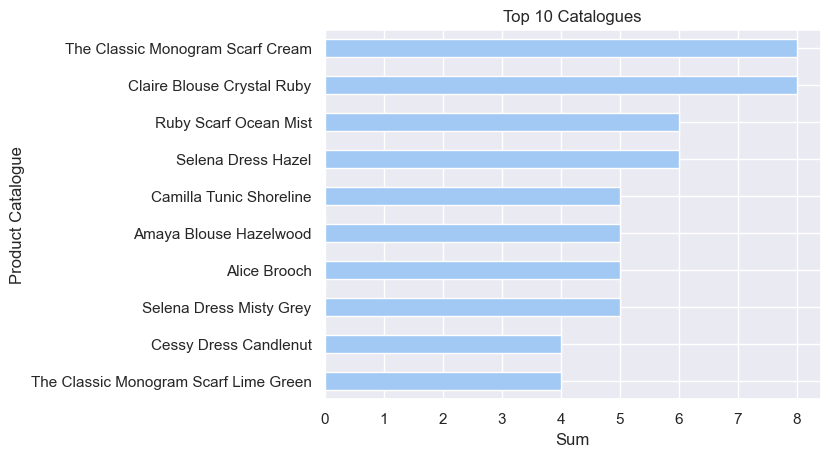

In [52]:
# Mendapatkan data untuk visualisasi
answer_point_1 = dataframe.groupby('product_title')['orders_quantity'].sum().sort_values(ascending=True).tail(10)

# Membuat visualisasi bar
answer_point_1.plot(kind='barh')

# Menambahkan label
plt.xlabel('Sum')
plt.ylabel('Product Catalogue')
plt.title('Top 10 Catalogues')

# Menampilkan visualisasi
plt.show()

### 2. Apa tipe produk yang paling banyak diminati oleh pembeli?

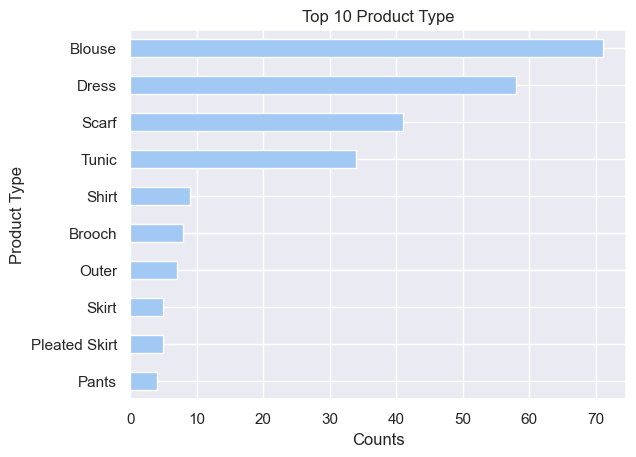

In [53]:
# Mendapatkan data untuk visualisasi
answer_point_2 = dataframe.groupby('product_type')['orders_quantity'].sum().sort_values(ascending=True).tail(10)

answer_point_2.plot(kind='barh')

# Menambahkan label
plt.xlabel('Counts')
plt.ylabel('Product Type')
plt.title('Top 10 Product Type')

# Menampilkan visualisasi
plt.show()

### 3. Apa tipe produk beserta warna produk yang paling banyak diminati?

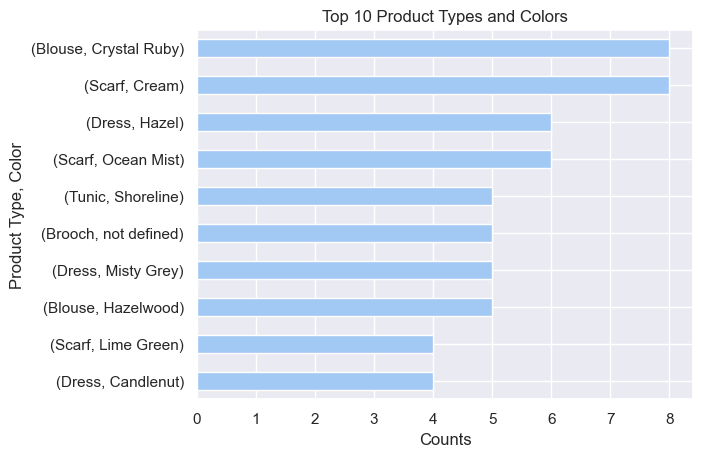

In [54]:
# Mendapatkan data untuk visualisasi dan mengurutkannya
answer_point_3 = dataframe.groupby(['product_type', 'product_color'])['orders_quantity'].sum().sort_values(ascending=True).tail(10)

# Membuat visualisasi bar dengan posisi sumbu x dan y dibalik
answer_point_3.plot(kind='barh')

# Menambahkan label
plt.xlabel('Counts')
plt.ylabel('Product Type, Color')
plt.title('Top 10 Product Types and Colors')

# Menampilkan visualisasi
plt.show()

### 4. Apa media yang paling banyak digunakan untuk bertransaksi?

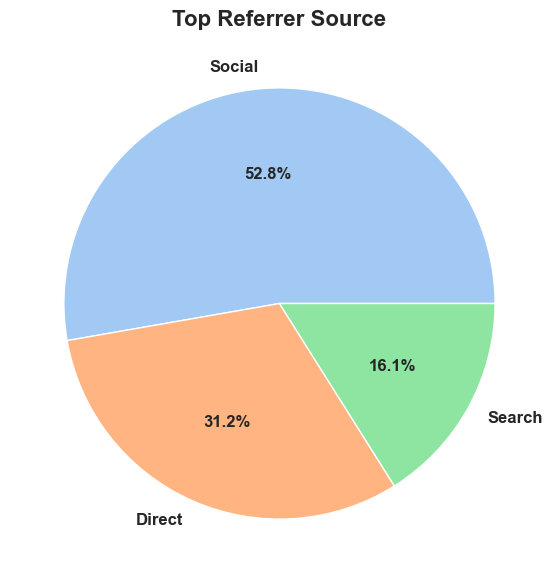

In [55]:
# Mendapatkan data untuk visualisasi dan mengurutkannya
answer_point_4 = dataframe['referrer_source'].value_counts().sort_values(ascending=False).head(10)

# Membuat pie chart menggunakan matplotlib
plt.figure(figsize=(7,7))
plt.title('Top Referrer Source', weight='bold', fontsize=16)
plt.pie(answer_point_4, labels=answer_point_4.index, autopct='%1.1f%%', textprops={'weight': 'bold', 'fontsize': 12})

# Mempercantik dengan seaborn
sns.set_theme()
sns.set_palette("pastel")

# Menampilkan visualisasi
plt.show()

### 5. Apa domisili dari pembeli yang paling sering membeli produk di Klambi, dan Tipe Produk apa yang paling diminati di kota tersebut?

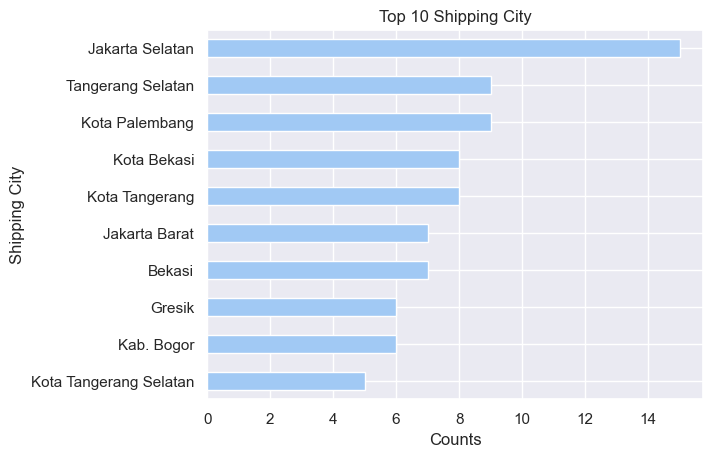

In [56]:
# Mendapatkan data untuk visualisasi dan mengurutkannya
answer_point_5 = dataframe['shipping_city'].value_counts().sort_values(ascending=True).tail(10)

# Membuat visualisasi bar dengan posisi sumbu x dan y dibalik
answer_point_5.plot(kind='barh')

# Menambahkan label
plt.xlabel('Counts')
plt.ylabel('Shipping City')
plt.title('Top 10 Shipping City')

# Menampilkan visualisasi
plt.show()

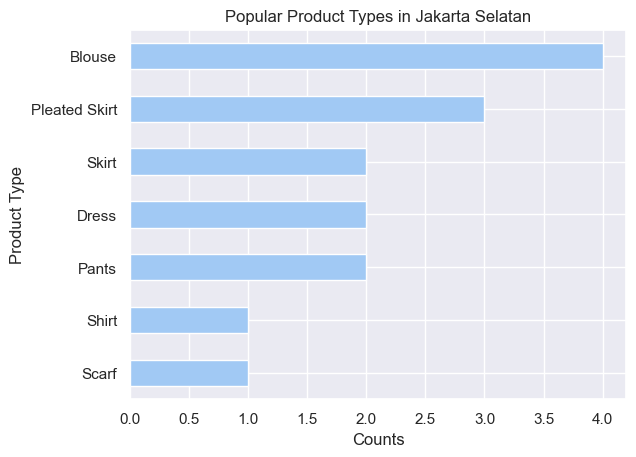

In [57]:
# tipe produk yang paling banyak diminati di Jakarta Selatan
answer_point_5_b = dataframe[dataframe['shipping_city'] == 'Jakarta Selatan']['product_type'].value_counts().sort_values(ascending=True)

# Membuat visualisasi bar
answer_point_5_b.plot(kind='barh')

# Menambahkan label
plt.xlabel('Counts')
plt.ylabel('Product Type')
plt.title('Popular Product Types in Jakarta Selatan')

# Menampilkan visualisasi
plt.show()

### 6. Apa produk yang memiliki harga satuan termahal?

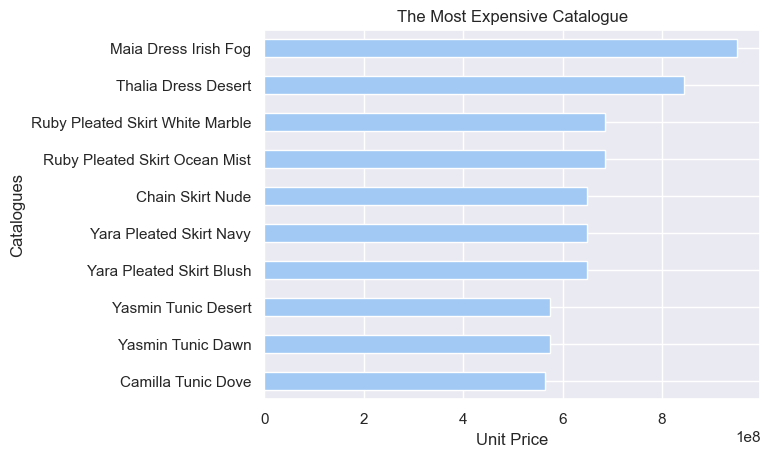

In [58]:
answer_point_6 = dataframe.groupby('product_title')['unit_price'].max().sort_values(ascending=True).tail(10)

# Membuat visualisasi bar
answer_point_6.plot(kind='barh')

# Menambahkan label
plt.xlabel('Unit Price')
plt.ylabel('Catalogues')
plt.title('The Most Expensive Catalogue')

# Menampilkan visualisasi
plt.show()

### 7. Apa saja produk yang paling diminati di setiap Kota atau Kabupaten?

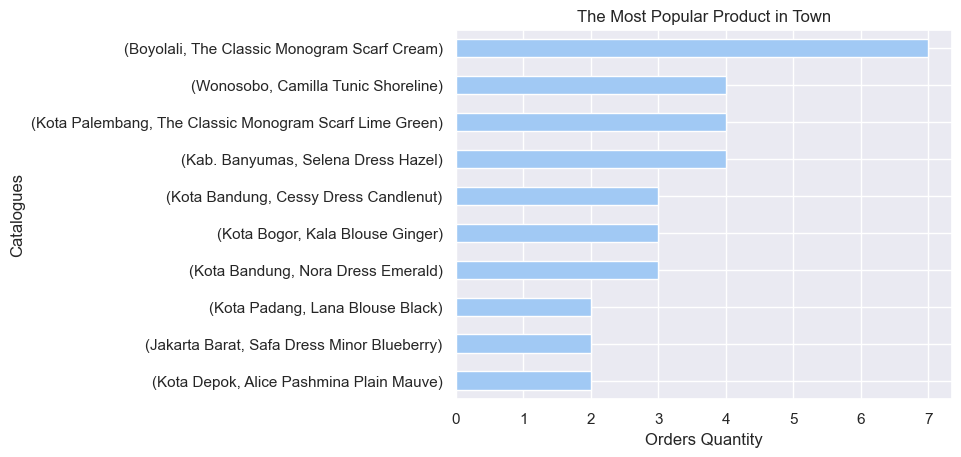

In [59]:
answer_point_7 = dataframe.groupby(['shipping_city', 'product_title'])['orders_quantity'].sum().sort_values(ascending=True).tail(10)

# Membuat visualisasi bar
answer_point_7.plot(kind='barh')

# Menambahkan label
plt.xlabel('Orders Quantity')
plt.ylabel('Catalogues')
plt.title('The Most Popular Product in Town')

# Menampilkan visualisasi
plt.show()

### 8. Berapa total dan rata-rata sales dari keseluruhan produk (berdasarkan produk, tipe produk, shipping city)?

#### 1. By Product Title

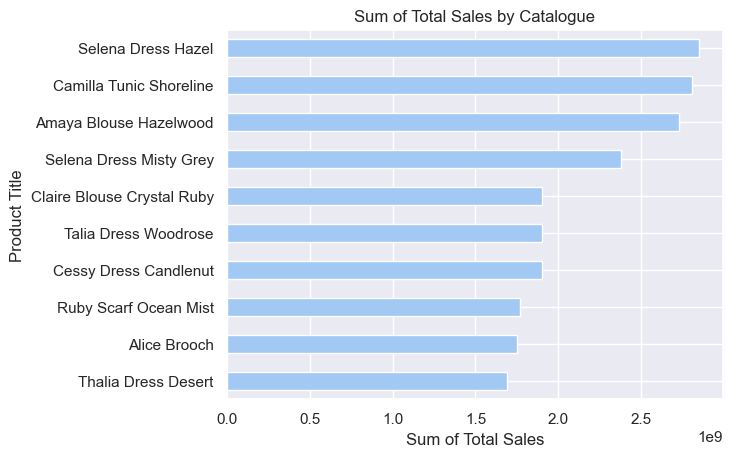

In [60]:
answer_point_8_1a = dataframe.groupby('product_title')['total_sales'].sum().sort_values(ascending=True).tail(10)

# Membuat visualisasi bar
answer_point_8_1a.plot(kind='barh')

# Menambahkan label
plt.xlabel('Sum of Total Sales')
plt.ylabel('Product Title')
plt.title('Sum of Total Sales by Catalogue')

# Menampilkan visualisasi
plt.show()

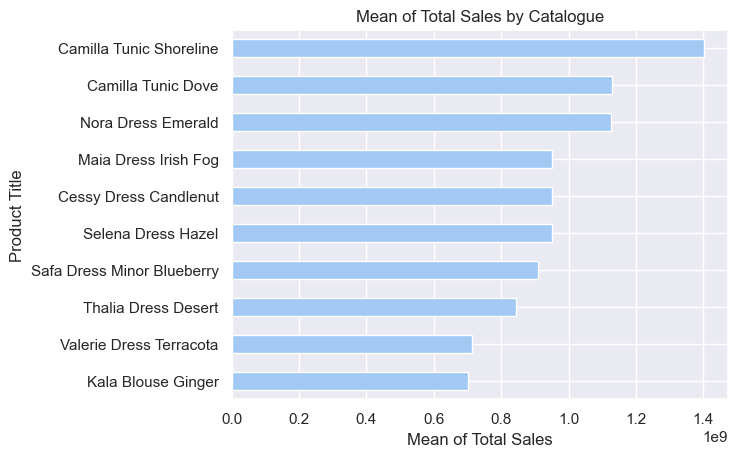

In [61]:
answer_point_8_1b = dataframe.groupby('product_title')['total_sales'].mean().sort_values(ascending=True).tail(10)

# Membuat visualisasi bar
answer_point_8_1b.plot(kind='barh')

# Menambahkan label
plt.xlabel('Mean of Total Sales')
plt.ylabel('Product Title')
plt.title('Mean of Total Sales by Catalogue')

# Menampilkan visualisasi
plt.show()

#### 2. By Product Type

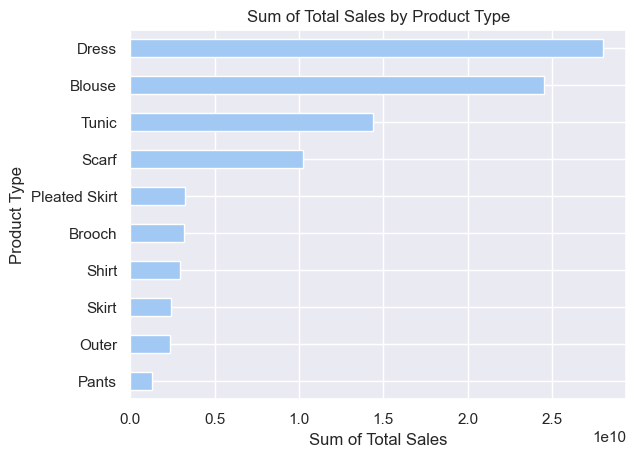

In [62]:
answer_point_8_2a = dataframe.groupby('product_type')['total_sales'].sum().sort_values(ascending=True).tail(10)

# Membuat visualisasi bar
answer_point_8_2a.plot(kind='barh')

# Menambahkan label
plt.xlabel('Sum of Total Sales')
plt.ylabel('Product Type')
plt.title('Sum of Total Sales by Product Type')

# Menampilkan visualisasi
plt.show()

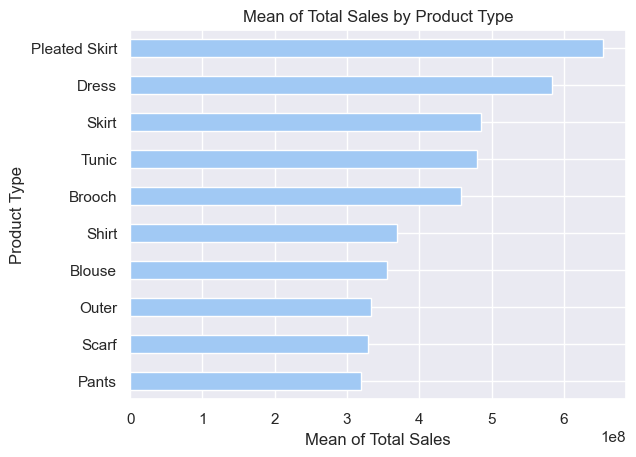

In [63]:
answer_point_8_2b = dataframe.groupby('product_type')['total_sales'].mean().sort_values(ascending=True).tail(10)

# Membuat visualisasi bar
answer_point_8_2b.plot(kind='barh')

# Menambahkan label
plt.xlabel('Mean of Total Sales')
plt.ylabel('Product Type')
plt.title('Mean of Total Sales by Product Type')

# Menampilkan visualisasi
plt.show()

#### 3. By Shipping City

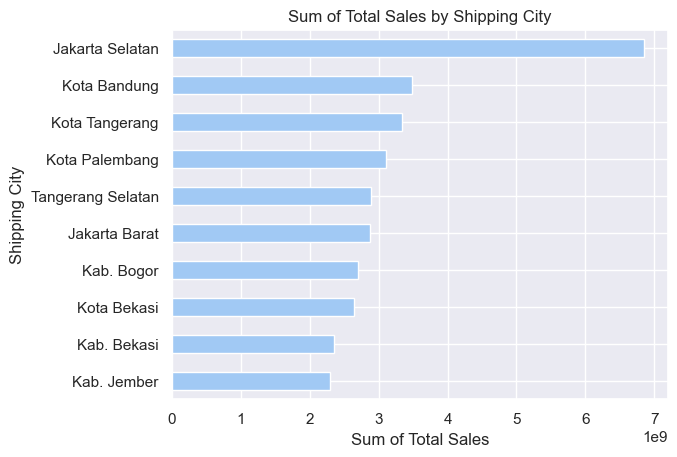

In [64]:
answer_point_8_3a = dataframe.groupby('shipping_city')['total_sales'].sum().sort_values(ascending=True).tail(10)

# Membuat visualisasi bar
answer_point_8_3a.plot(kind='barh')

# Menambahkan label
plt.xlabel('Sum of Total Sales')
plt.ylabel('Shipping City')
plt.title('Sum of Total Sales by Shipping City')

# Menampilkan visualisasi
plt.show()

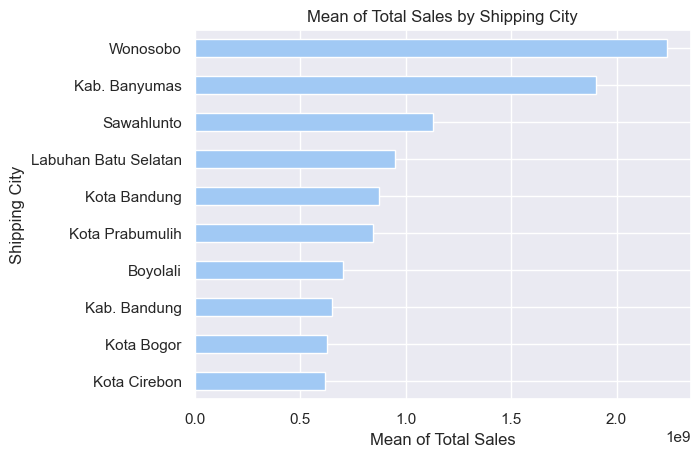

In [65]:
answer_point_8_3b = dataframe.groupby('shipping_city')['total_sales'].mean().sort_values(ascending=True).tail(10)

# Membuat visualisasi bar
answer_point_8_3b.plot(kind='barh')

# Menambahkan label
plt.xlabel('Mean of Total Sales')
plt.ylabel('Shipping City')
plt.title('Mean of Total Sales by Shipping City')

# Menampilkan visualisasi
plt.show()

### 9. Produk apa, dan pembeli dari Kota mana yang pernah mendapatkan discount?

In [66]:
dataframe[dataframe['discounts'] != 0]

,product_title,product_name_or_series_name,product_type,product_color,shipping_city,referrer_source,orders_quantity,unit_price,gross_sales,discounts,net_sales,total_sales
33,Kala Blouse Sierra,Kala,Blouse,Sierra,Bekasi,Direct,1,395000000,395000000,5724640,389275360,389275360
36,Dayu Scarf Ruby,Dayu,Scarf,Ruby,Bekasi,Direct,1,295000000,295000000,4275360,290724640,290724640
84,Lana Blouse Black,Lana,Blouse,Black,Kota Padang,Direct,1,200000000,200000000,3418810,196581190,196581190
85,Valerie Dress Powder Blue,Valerie,Dress,Powder Blue,Kab. Karawang,Direct,1,475000000,475000000,100000000,375000000,375000000
89,Klamby Monogram Brooch Rose Gold,Klamby Monogram,Brooch,Rose Gold,Kota Padang,Direct,1,385000000,385000000,6581190,378418810,378418810
99,Ruby Pleated Skirt White Marble,Ruby,Pleated Skirt,White Marble,Jakarta Selatan,Direct,1,685000000,685000000,50000000,635000000,635000000
106,Samara Tunic Creme Cheese,Samara,Tunic,Creme Cheese,Banjarnegara,Social,1,385000000,385000000,10000000,375000000,375000000
169,Camilla Tunic Shoreline,Camilla,Tunic,Shoreline,Wonosobo,Direct,4,565000000,2260000000,20000000,2240000000,2240000000
208,Daisy Tunic Terra Cotta,Daisy,Tunic,Terra Cotta,Kab. Tulungagung,Direct,1,385000000,385000000,50000000,335000000,335000000


In [67]:
dataframe[dataframe['orders_quantity'] > 2]

,product_title,product_name_or_series_name,product_type,product_color,shipping_city,referrer_source,orders_quantity,unit_price,gross_sales,discounts,net_sales,total_sales
64,Kala Blouse Ginger,Kala,Blouse,Ginger,Kota Bogor,Direct,3,350000000,1050000000,0,1050000000,1050000000
65,The Classic Monogram Scarf Lime Green,The Classic Monogram,Scarf,Lime Green,Kota Palembang,Social,4,169000000,676000000,0,676000000,676000000
68,Selena Dress Hazel,Selena,Dress,Hazel,Kab. Banyumas,Direct,4,475000000,1900000000,0,1900000000,1900000000
129,The Classic Monogram Scarf Cream,The Classic Monogram,Scarf,Cream,Boyolali,Search,7,169000000,1183000000,0,1183000000,1183000000
139,Nora Dress Emerald,Nora,Dress,Emerald,Kota Bandung,Direct,3,375000000,1125000000,0,1125000000,1125000000
169,Camilla Tunic Shoreline,Camilla,Tunic,Shoreline,Wonosobo,Direct,4,565000000,2260000000,20000000,2240000000,2240000000
185,Cessy Dress Candlenut,Cessy,Dress,Candlenut,Kota Bandung,Direct,3,475000000,1425000000,0,1425000000,1425000000


##  HASIL ANALISIS

1. Katalog yang paling banyak diminati oleh pembeli berdasarkan Total Order Quantity secara berurutan adalah:
- The Classic Monogram Scarf Cream
- Claire Blouse Cristal Ruby
- Ruby Scarf Ocean Mist
- Sheila Dress Clove

2. Tipe/Jenis produk yang paling banyak diminati oleh pembeli berdasarkan Total Order Quantity secara berurutan adalah:
- Blouse
- Dress
- Scarf
- Tunic

3. Tipe dan Warna Produk yang paling banyak diminati oleh pembeli berdasarkan order quantity:
- Blouse, Cristal Ruby
- Scarf, Cream
- Dress, Hazel
- Scarf, Ocean Mist
- Tunic, Shoreline

4. Media yang paling sering digunakan untuk transaksi secara berurutan:
- Social    : 52.8%
- Direct    : 31.2%
- Search    : 16.1%

5. Domisili dari pembeli yang paling sering membeli produk di Klambi, dan Tipe Produk yang paling diminati di kota tersebut:
- Jakarta Selatan (Blouse, Pleated Skirt, Skirt, Dress, Pants)
- Tangerang Selatan
- Kota Palembang
- Kota Bekasi
- Kota Tangerang

6. Produk yang memiliki harga satuan termahal
- Maia Dress irish Fog
- Thalia Dress Dessert
- Ruby Pleated Skirt White Marble
- Ruby Pleated Skirt Ocean Mist
- Chain Skirt Nude

7. Produk yang paling diminati di setiap Kota atau Kabupaten berdasarkan Orders Quantity
- Boyolali, The Classic Monogram Scarf Cream
- Wonosobo, Camilla Tunic Shoreline
- Kota Palembang, The Classic Monogram Scarf Lime Green

## Insight
Berdasarkan hasil analisis di atas, saya menemukan beberapa kesimpulan menarik yang perlu diungkapkan

1. Jakarta Selatan, Tangerang Selatan, Kota Palembang, Kota Bekasi, Kota Tangerang secara berurutan merupakan Kota yang paling banyak berbelanja produk di Klamby.

2. Tipe/Jenis Produk yang banyak diminati dari Klamby adalah Blouse (khususnya warna Cristal Ruby), Dress (khususnya warna Hazel), Scarf (khususnya warna Cream dan Ocean Mist), dan Tunic (khususnya warna Shoreline). Mungkin klamby dapat meningkatkan produksi dan promosi terhadap jenis produk ini.

3. Konsumen lebih banyak berbelanja melalui media sosial, terbukti bahwa transaksi dari media sosial sebesar 52,8%. Ini membuktikan bahwa penjualan Klamby sukses di media sosial dan ecommerce.

4. Kemungkinan harga dress untuk katalog "Maia Dress Irish Fog" dan "Thalia Dress Desert" terlalu mahal untuk dijangkau konsumen? Karena tidak muncul sama sekali dalam 10 Top Catalogues.